In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Position_Salaries.csv')
df


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,Head,10,900000


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  12 non-null     object
 1   Level     12 non-null     int64 
 2   Salary    12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


In [5]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

<AxesSubplot:xlabel='Level', ylabel='Salary'>

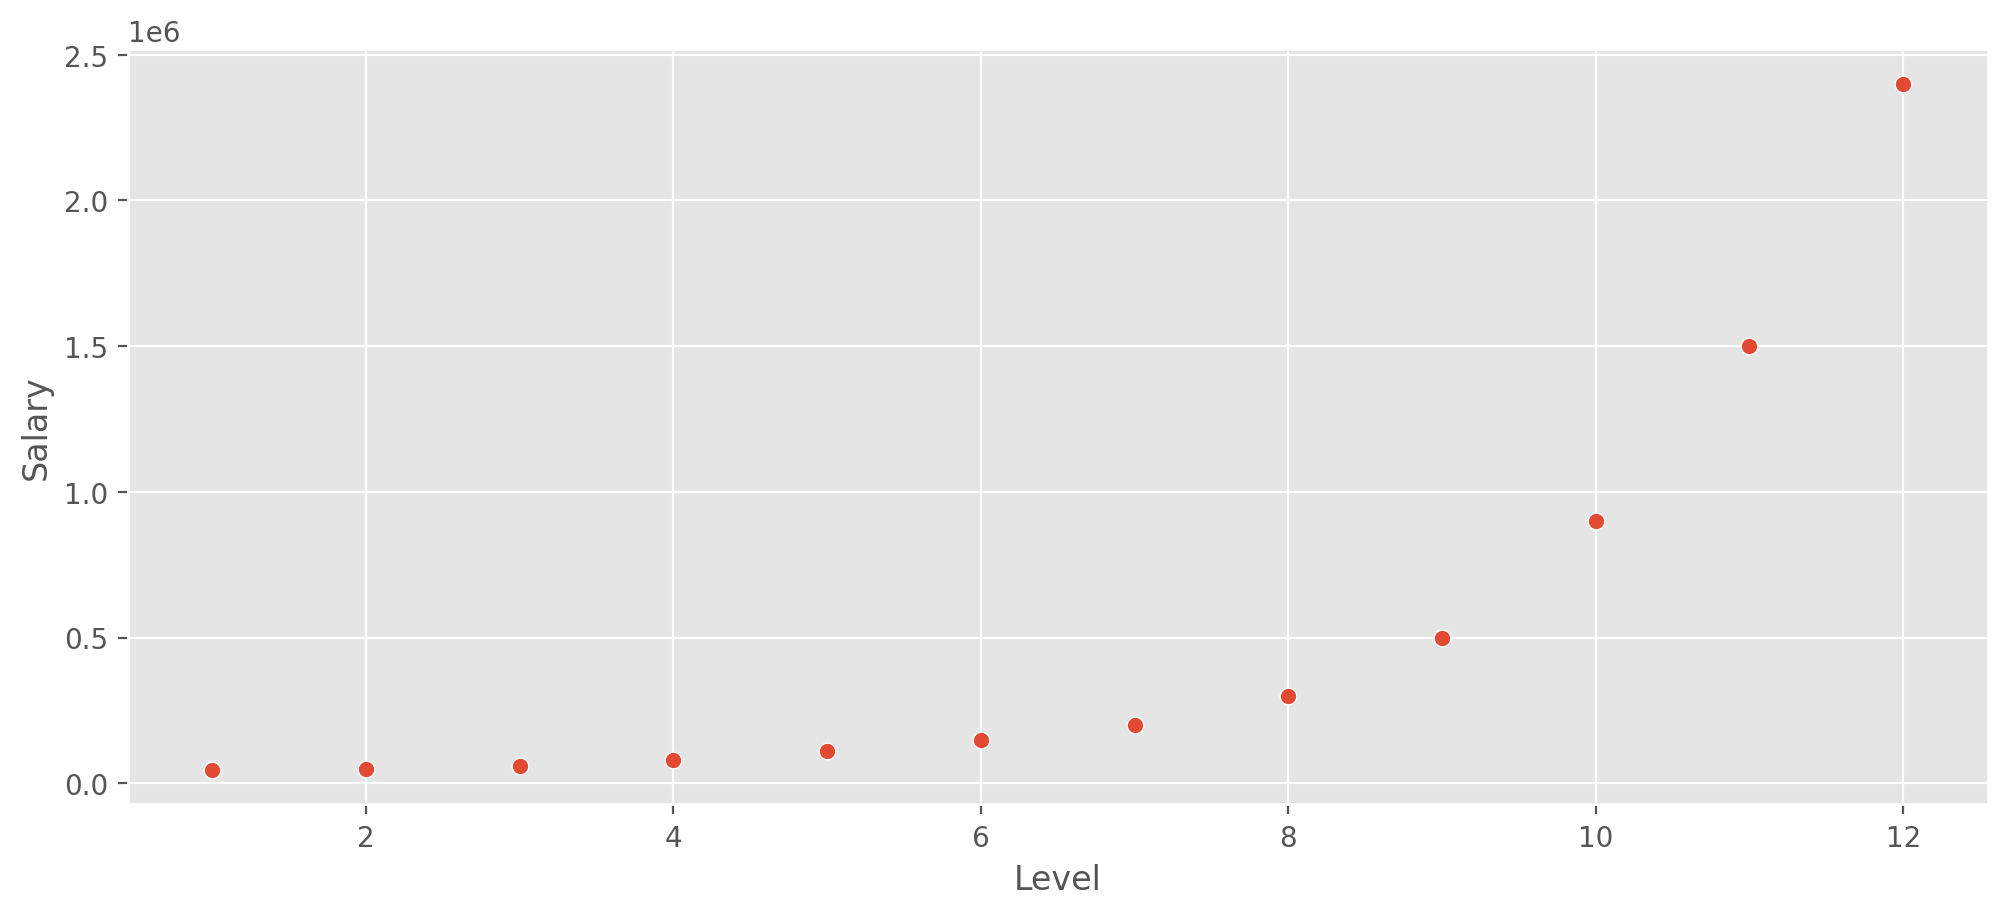

In [6]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot('Level','Salary',data=df)

- The relationship between 

In [7]:
X=df[["Level"]].values
Y=df[["Salary"]].values

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]], dtype=int64)

In [9]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [ 900000],
       [1500000],
       [2400000]], dtype=int64)

In [10]:
#first let use a linear function then observe resullts
# Y'=B0+B1*X

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

In [12]:
lin_reg.score(X,Y)

0.6648255253208347

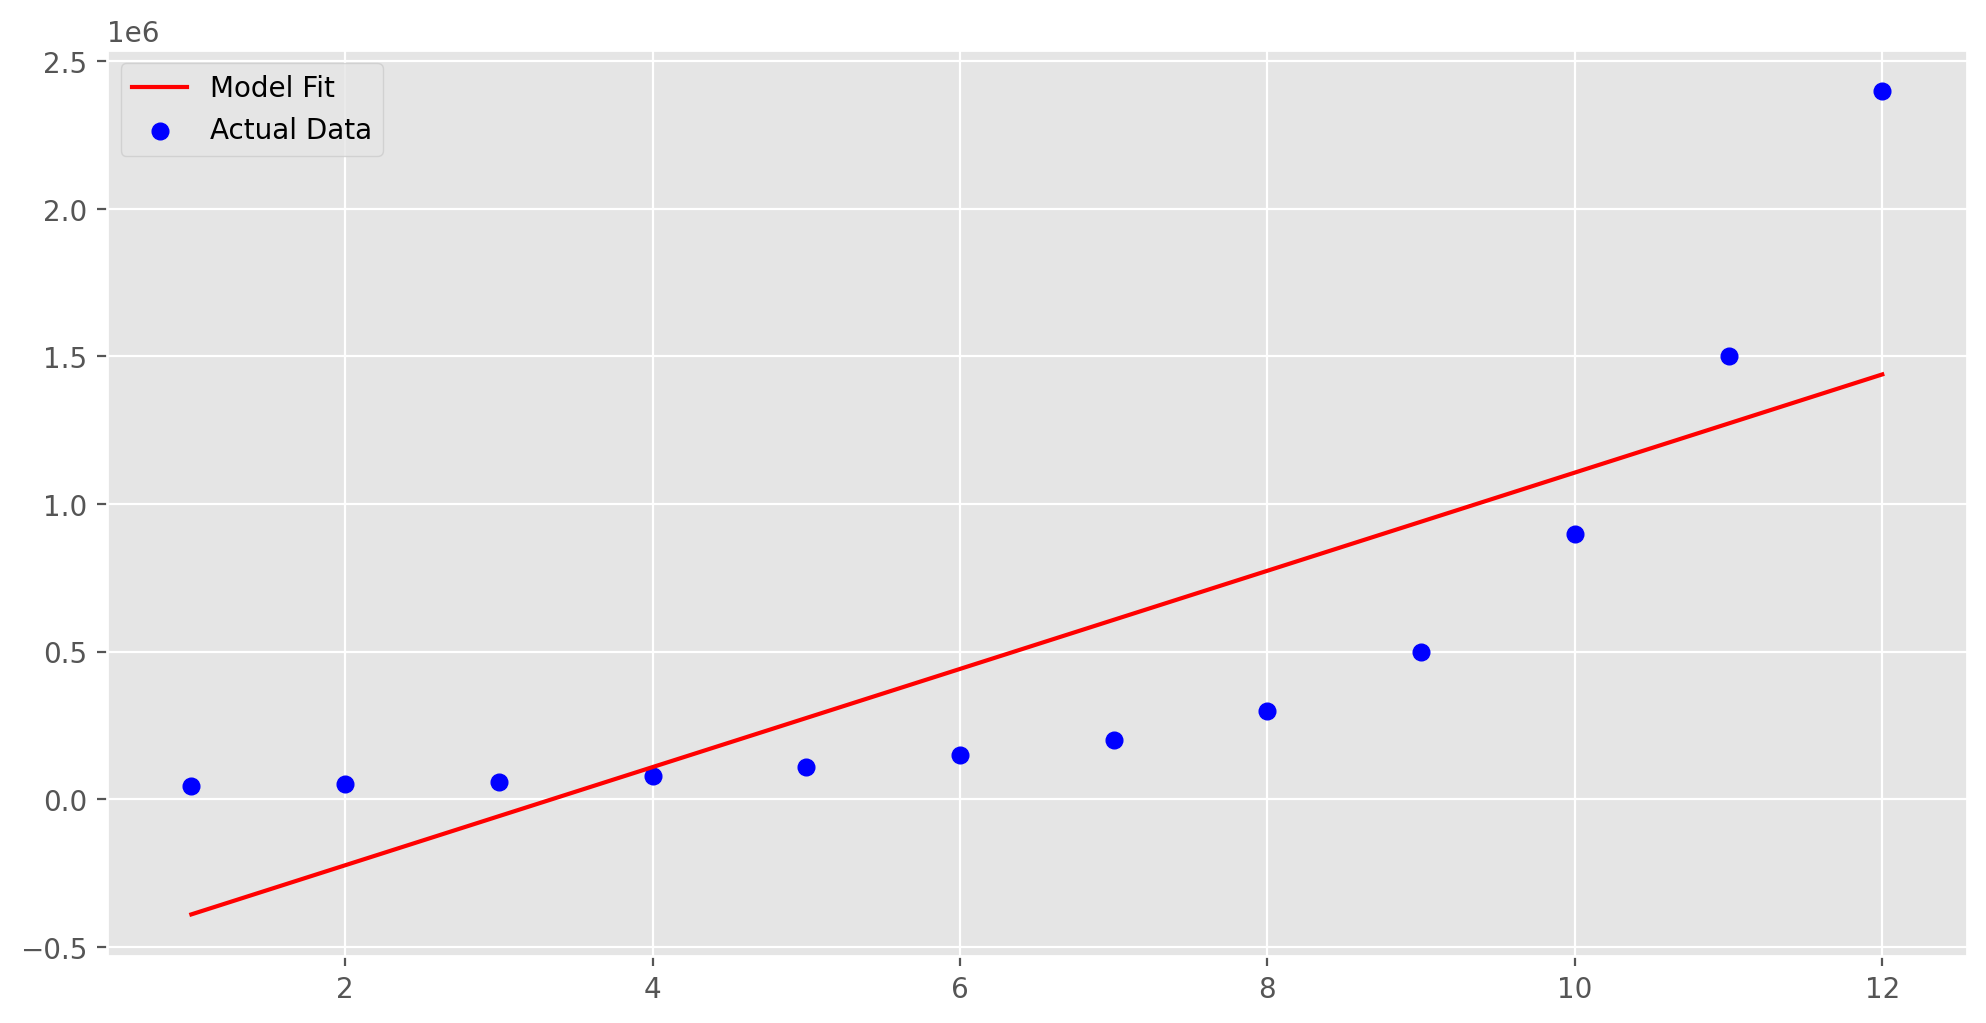

In [13]:
pred1=lin_reg.predict(X)

plt.figure(figsize=(12,6),dpi=200)
plt.scatter(X,Y,c='b',label="Actual Data")
plt.plot(X, pred1, c = 'r', label = 'Model Fit')
plt.legend()


# Using Polynomial Regression
- Linear Function is not capable of caturing non linear relationship
- We should introduce some higher degree variables
- Addding higher degree terms will make our function /model nonlinear and it will have the ablility  to capture non linear relationship

# Polnomial Regression (With Degree 2)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
ploy=PolynomialFeatures(degree =2)
X_ploy2=ploy.fit_transform(X)
X_ploy2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.]])

#### Y'=B0+B1*X+B2*X^2
- Let x=X1 and X^2=X2
#### Y'=B0+B1*X1+B2*X2

In [26]:
ploy_reg2=LinearRegression()
ploy_reg2.fit(X_ploy2,Y)

ploy_reg2.score(X_ploy2,Y)

0.9399309224217203

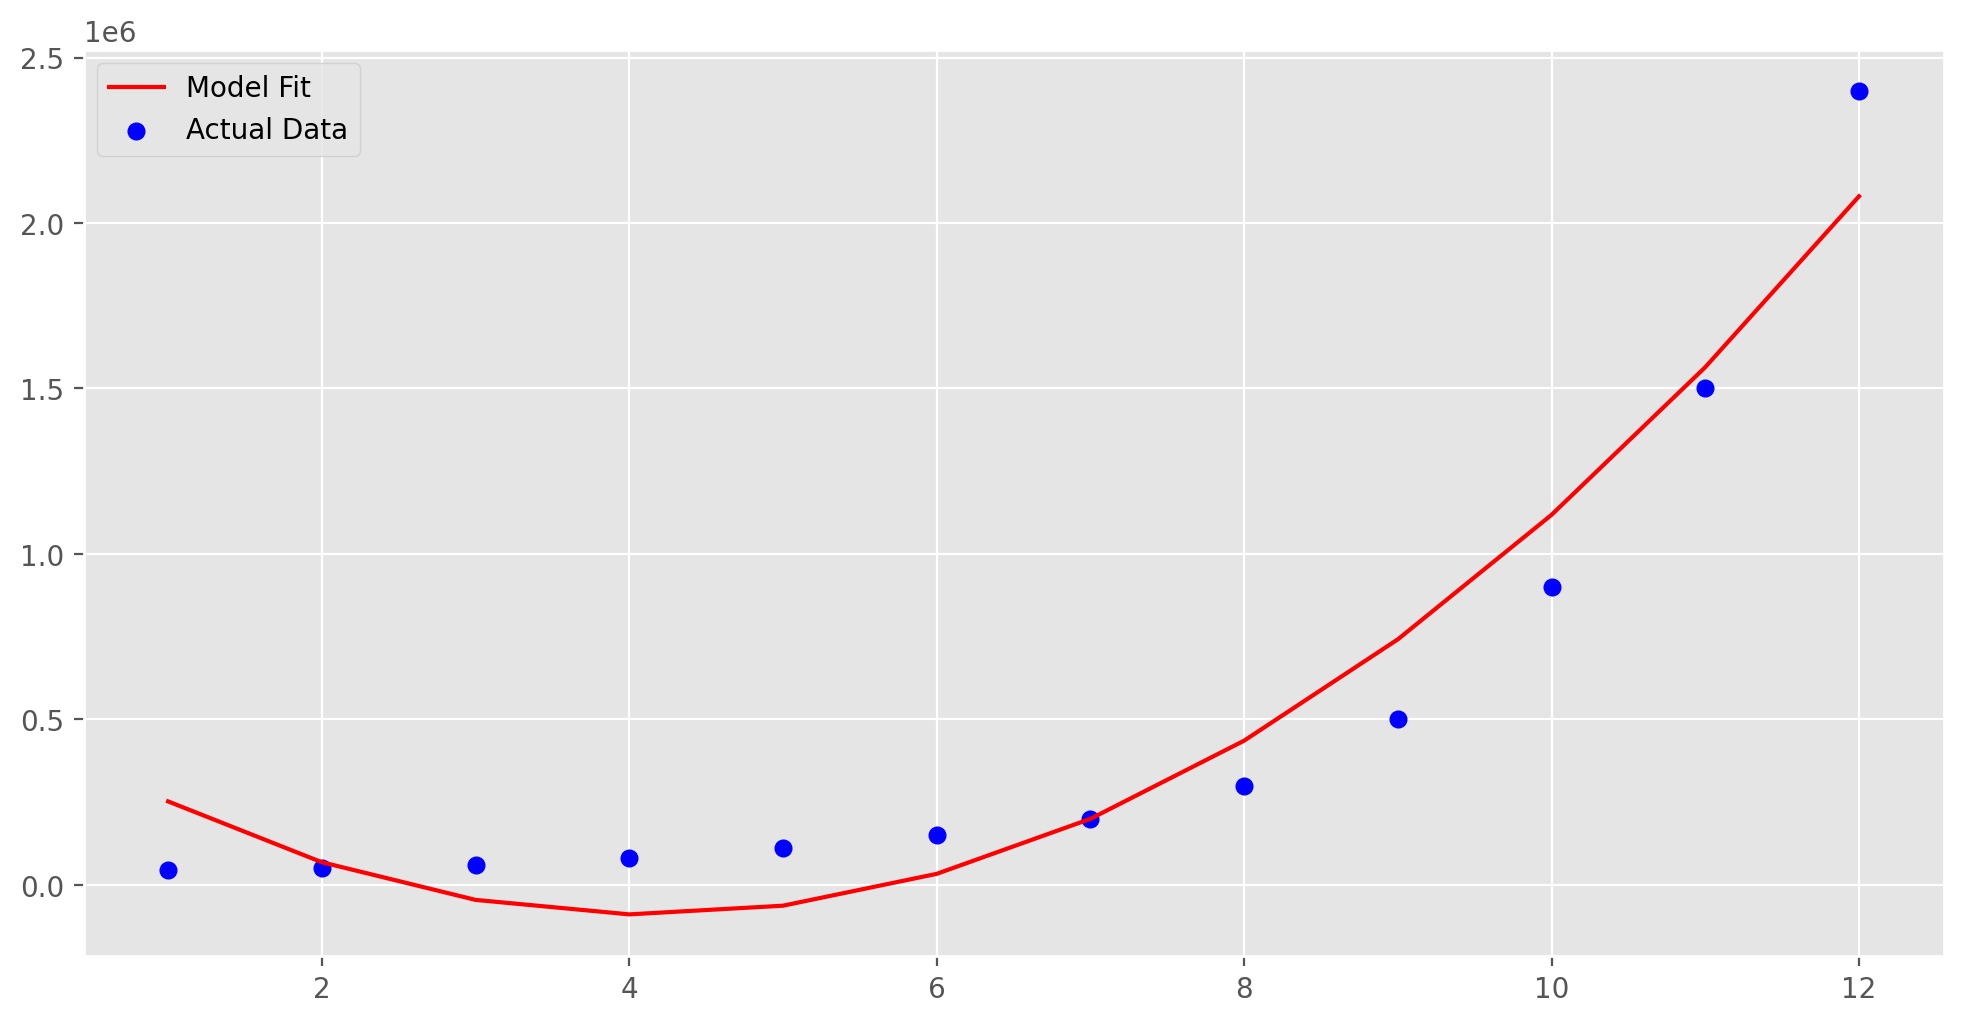

In [27]:
pred2 = ploy_reg2.predict(X_ploy2)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred2, c = 'r', label = 'Model Fit')
plt.legend()


# Polnomial Regression (With Degree 3)

In [28]:
# now Y'=B0+B1*x1+B2*X2+B3*X3

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_poly3 = poly.fit_transform(X)
X_poly3


array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03]])

In [30]:
poly_reg3 = LinearRegression()
poly_reg3.fit(X_poly3, Y)

poly_reg3.score(X_poly3, Y)


0.9955516291545836

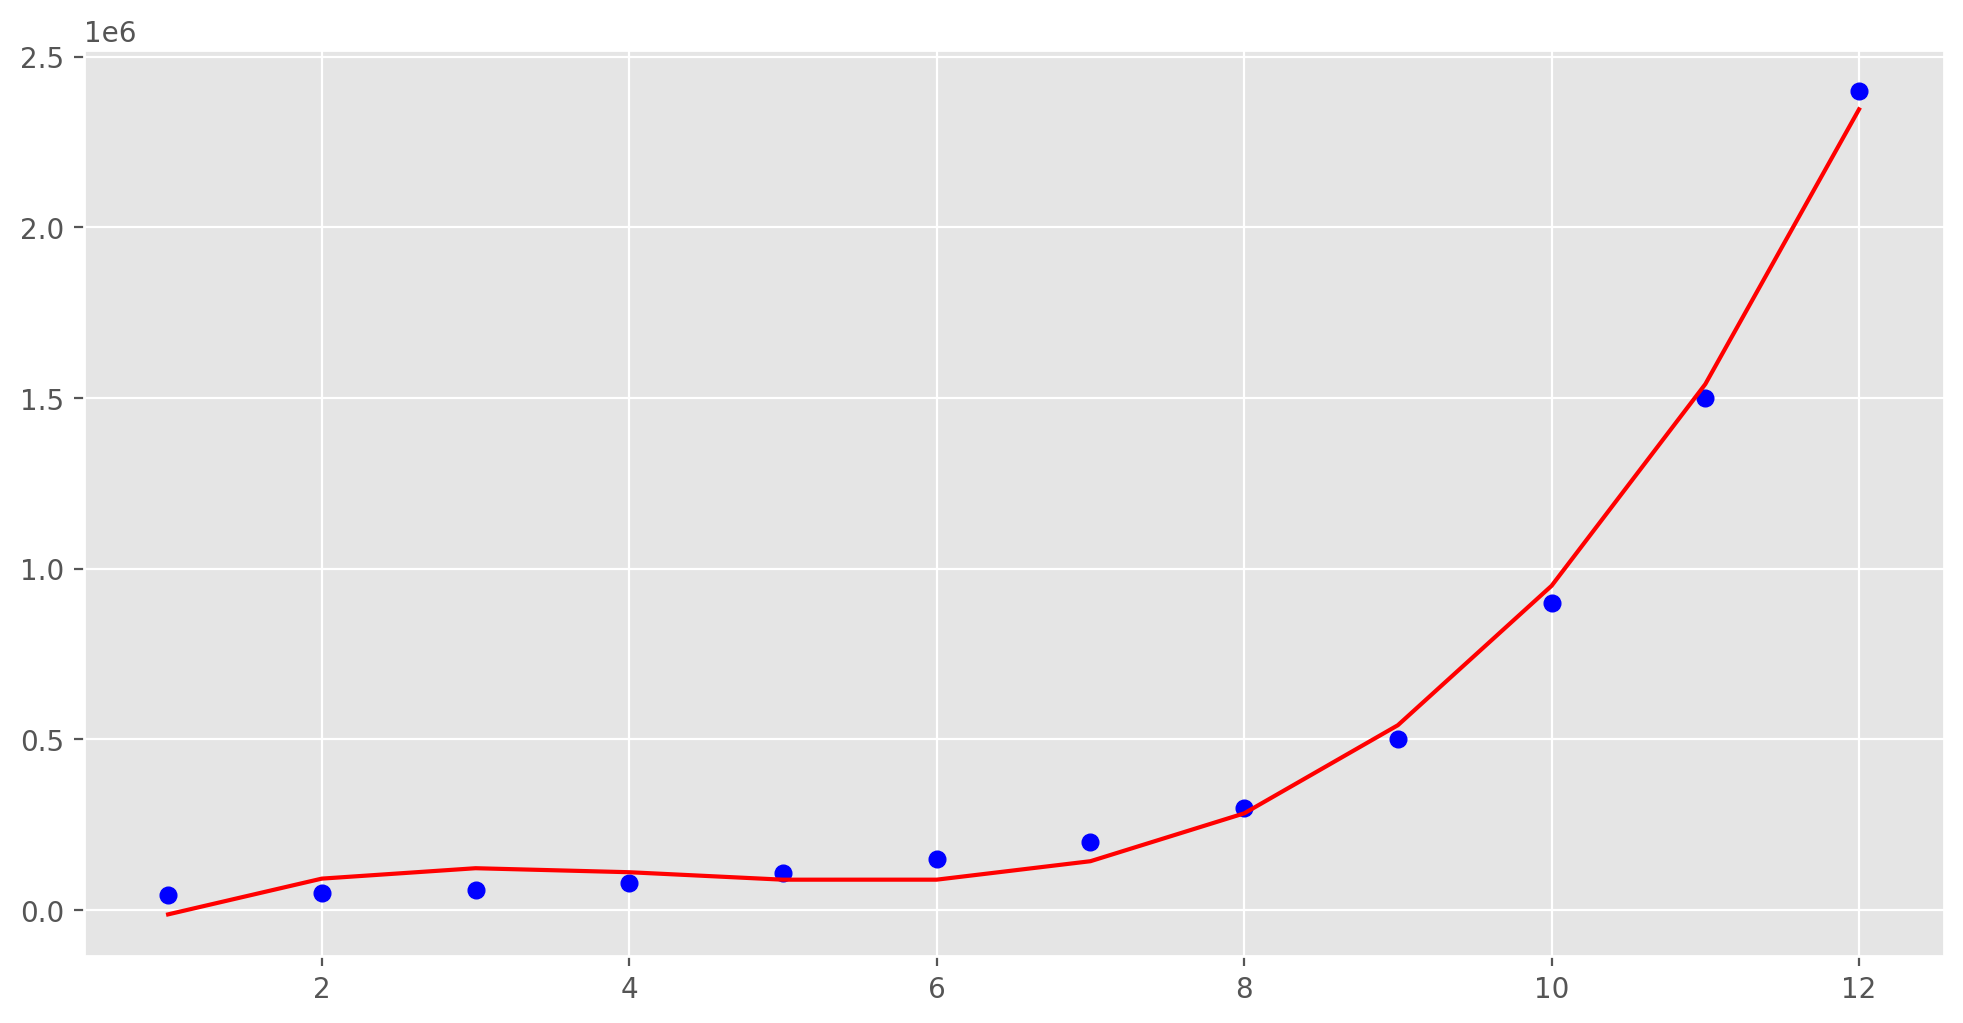

In [31]:
pred3 = poly_reg3.predict(X_poly3)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred3, c = 'r', label = 'Model Fit')


# Polnomial Regression (With Degree 6)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 6)
X_poly6 = poly.fit_transform(X)
X_poly6


array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01, 6.400000e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02, 7.290000e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03, 4.096000e+03],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03, 1.562500e+04],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03, 4.665600e+04],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04, 1.176490e+05],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04, 2.621440e+05],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000

In [33]:
poly_reg6 = LinearRegression()
poly_reg6.fit(X_poly6, Y)

poly_reg3.score(X_poly3, Y)


0.9955516291545836

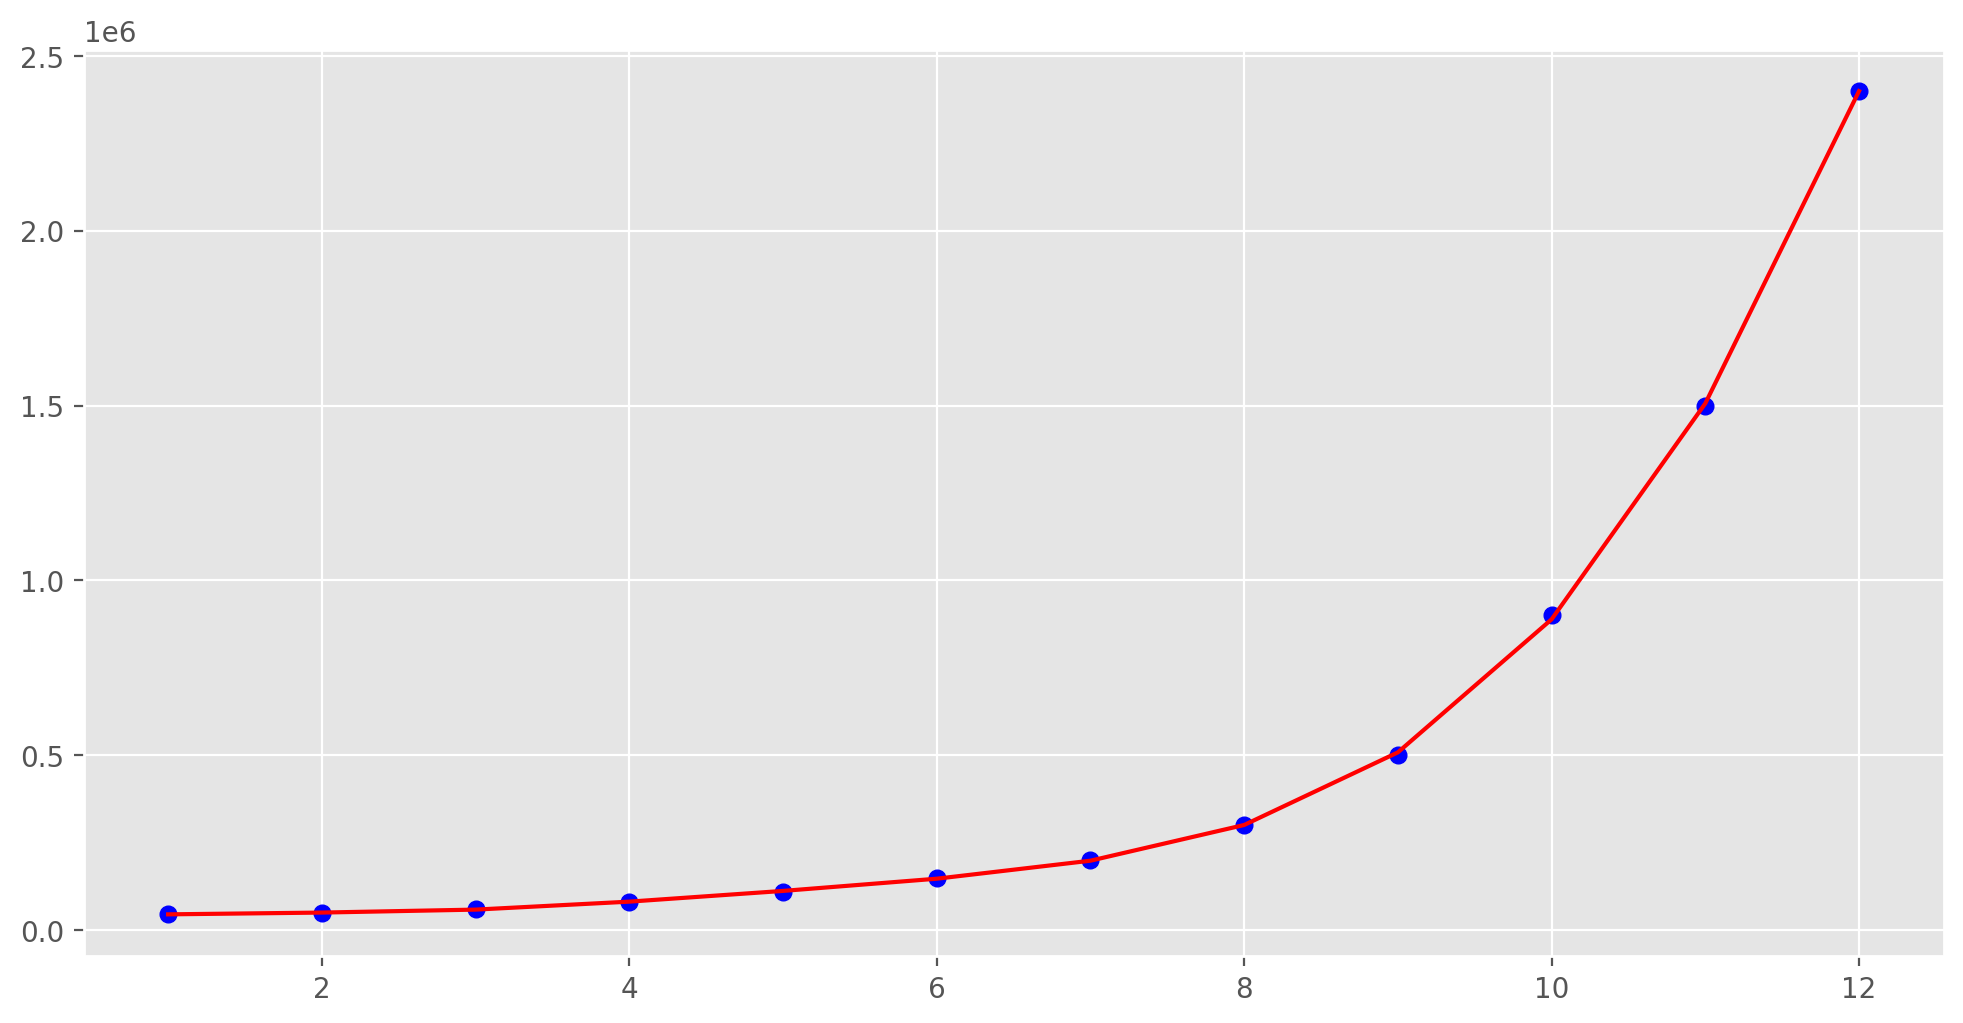

In [34]:
pred6 = poly_reg6.predict(X_poly6)

plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred6, c = 'r', label = 'Model Fit')


#  Comparing  different model fits

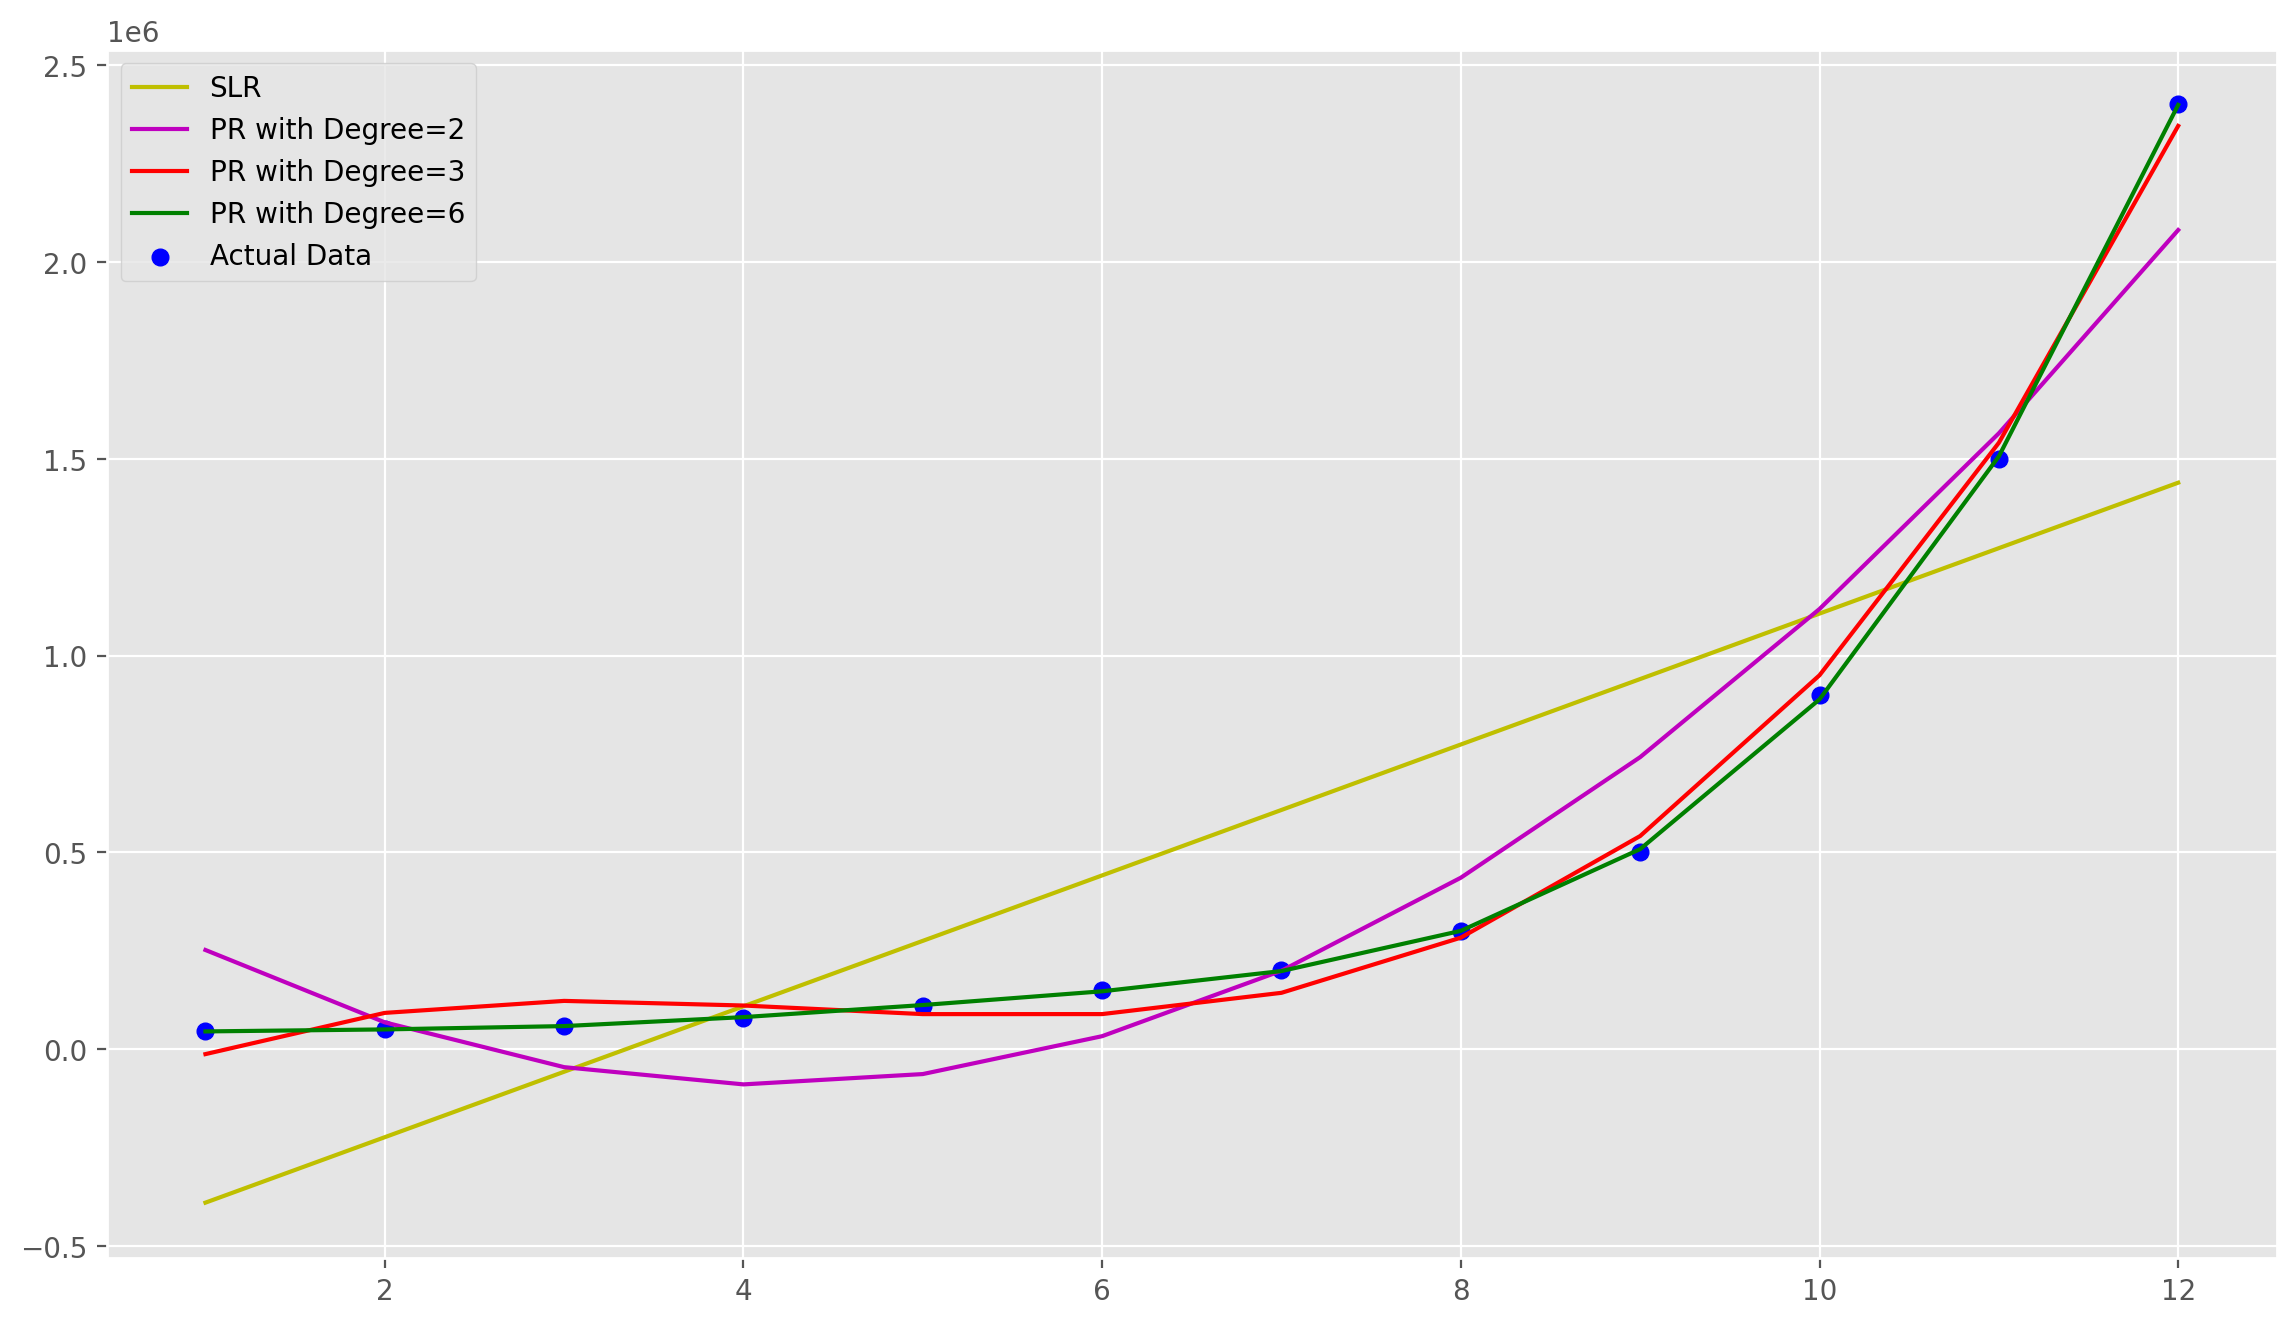

In [35]:
plt.figure(figsize=(14,8),dpi=200)
plt.scatter(X,Y,c='b',label="Actual Data")
plt.plot(X,pred1,c='y',label="SLR")
plt.plot(X,pred2,c='m',label="PR with Degree=2")
plt.plot(X,pred3,c='r',label="PR with Degree=3")
plt.plot(X,pred6,c='g',label="PR with Degree=6")
plt.legend()

# Is using more and more complex models always good
- Bias
- Variance
- Underfittng 
- Overfitting
- Bias- variance Tradeoff
